### **TP FINAL**
Micaela Kenigsberg, Gal Rubel y Sophia Grino

Nuestra IA va a resolver un gran problema: ¿Te pareces más a Tom o a Jerry?
Para eso agarramos una base de datos de más de XXXX imágenes etiquetadas como "Tom" o como "Jerry" y mediante el entrenamiento de una IA, nuestro modelo va a ser capas de recibir una foto e identiciar a cuál de los dos personajes se parece más.

## Librerías


In [18]:
!pip install keras-visualizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.0 MB/s eta 0:00:00


In [25]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.regularizers import l2
import numpy as np
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras_visualizer import visualizer
from tensorflow.keras.utils import plot_model
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
validation = image_dataset_from_directory(
    directory = '/content/drive/MyDrive/tom_and_jerry/tom_and_jerry/',
    labels='inferred',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=321,
    validation_split=0.2,
    subset='validation',
)
training = image_dataset_from_directory(
    directory = '/content/drive/MyDrive/tom_and_jerry/tom_and_jerry/',
    labels='inferred',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=321,
    validation_split=0.2,
    subset='training',
)



Found 3190 files belonging to 2 classes.
Using 638 files for validation.
Found 3190 files belonging to 2 classes.
Using 2552 files for training.


## Código


In [11]:
model =keras.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

In [12]:
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10))
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(training, epochs=1,
                    validation_data=(validation))

80/80 [==============================] - 390s 5s/step - loss: 30.1148 - accuracy: 0.6814 - val_loss: 0.4279 - val_accuracy: 0.8135


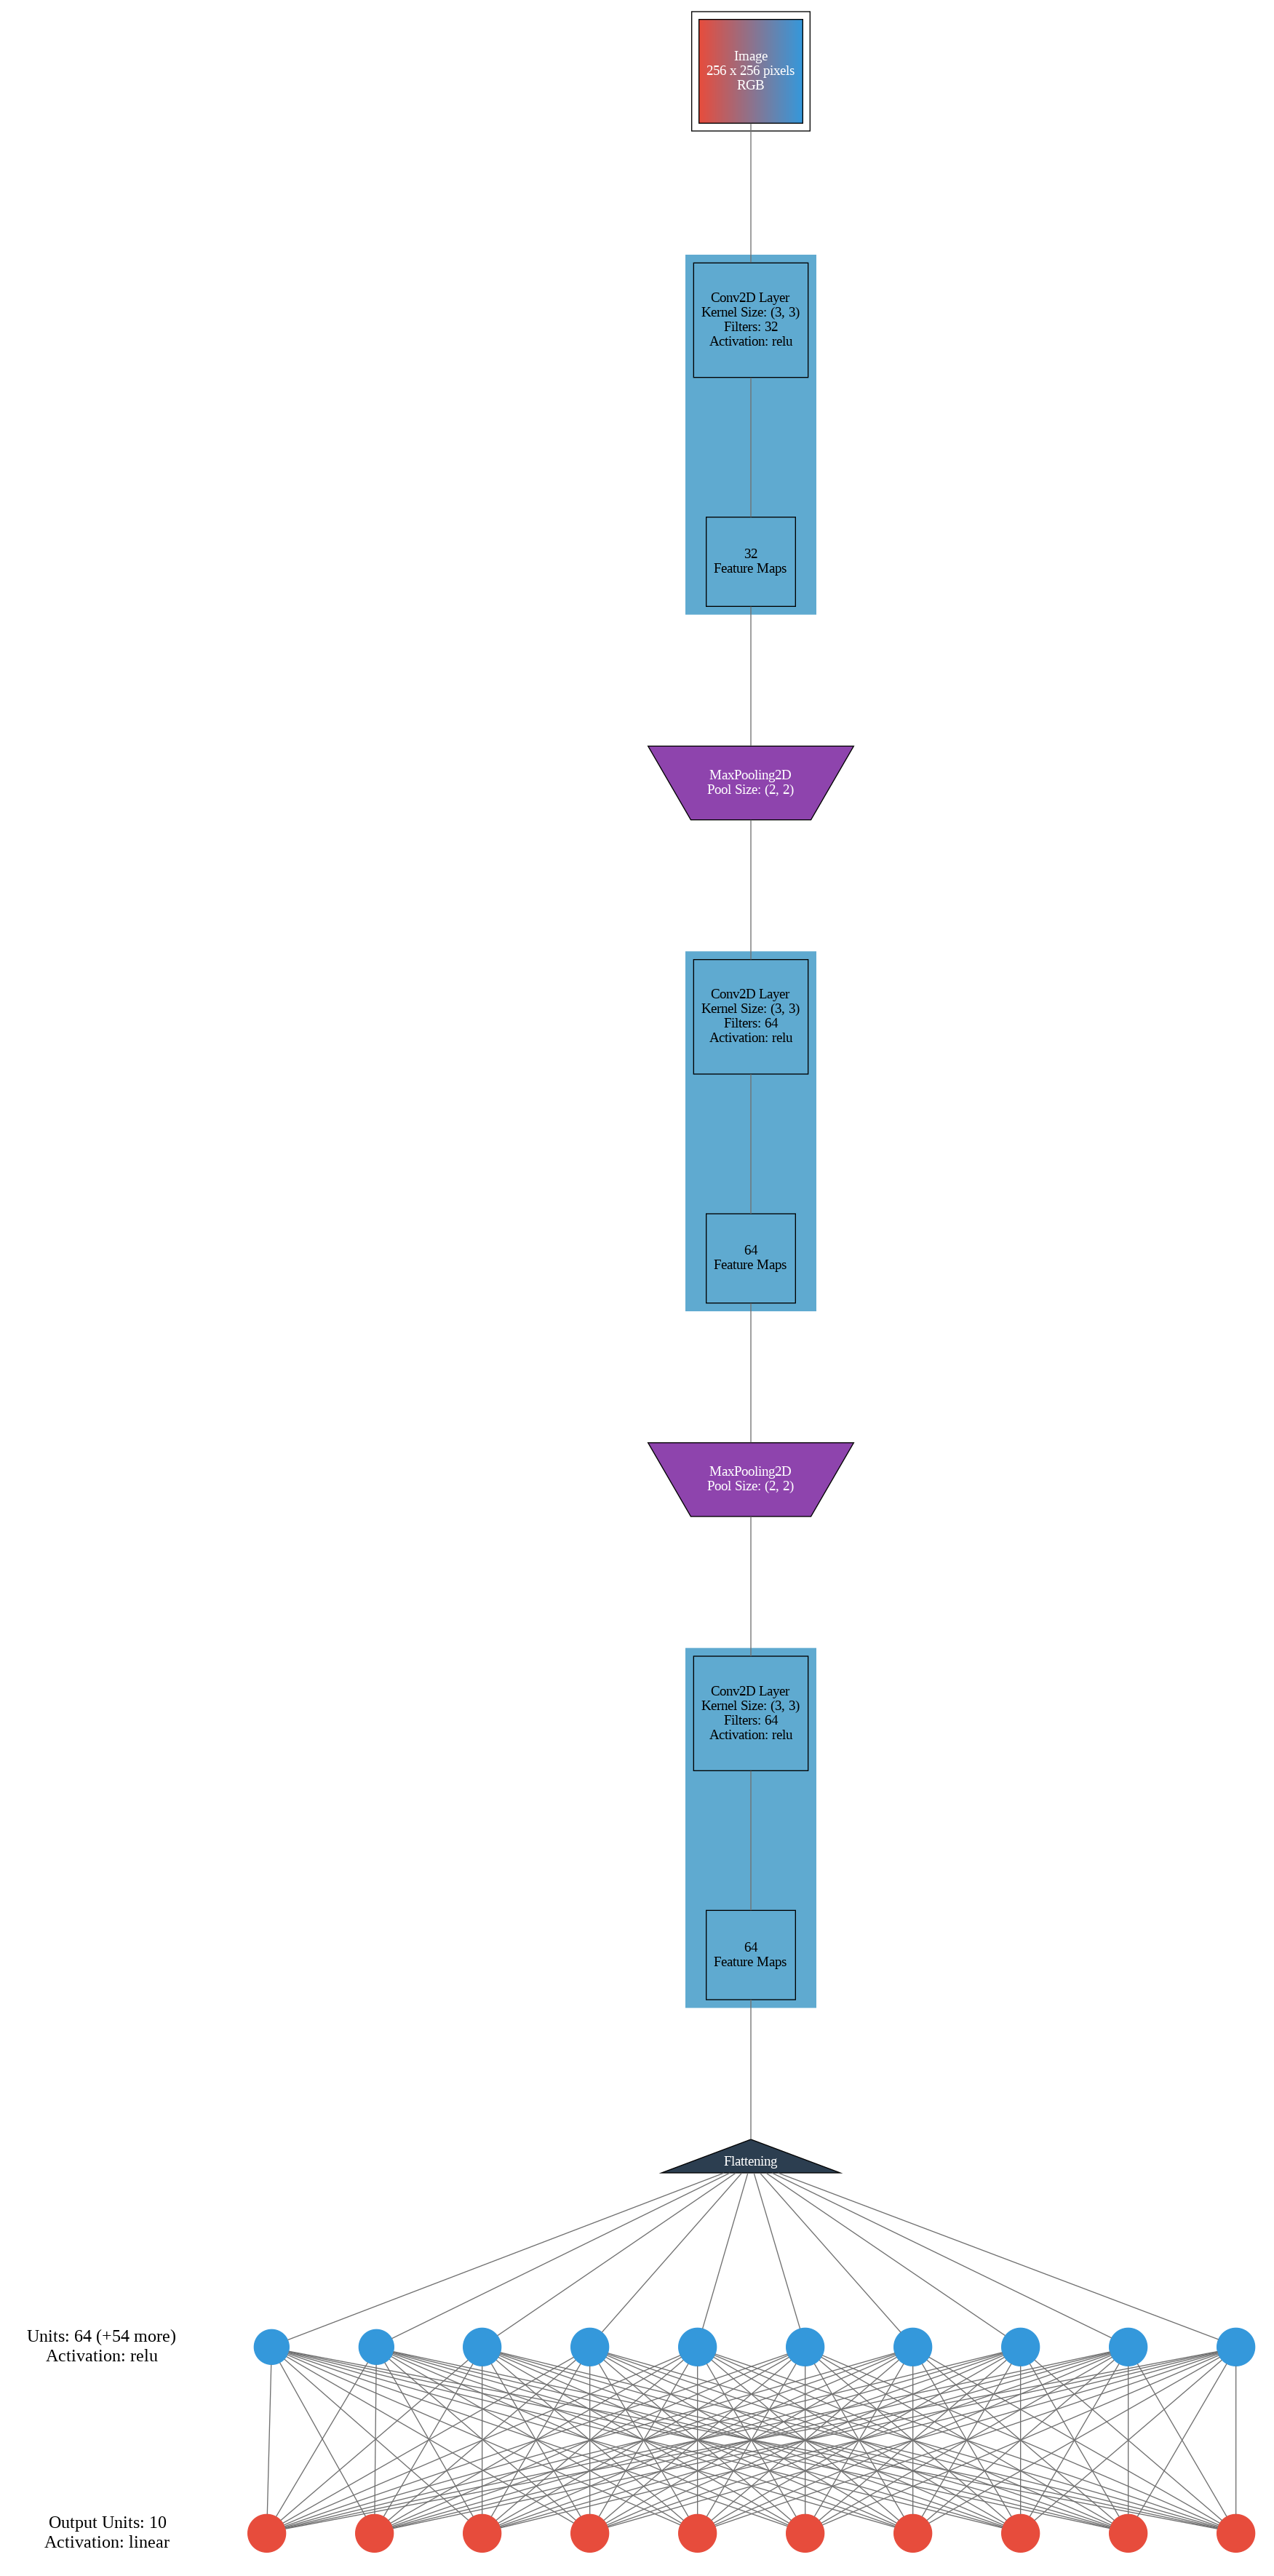

In [22]:
visualizer(model, file_format='png', view=True)
from PIL import Image
Image.open("graph.png")


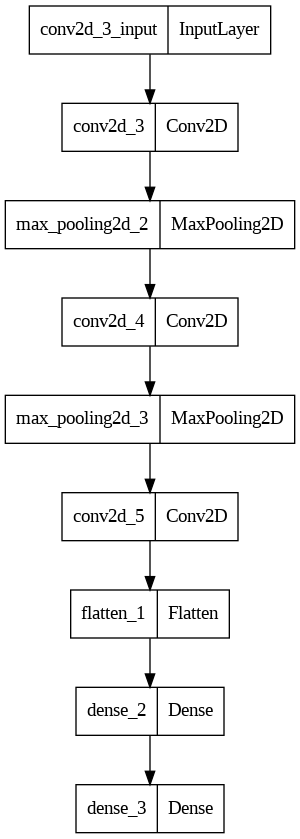

In [23]:
plot_model(model, to_file='model.png')

In [14]:
model.save("modeloChona.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
